In [158]:
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression, Lasso
import scikitplot as skplt
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report,roc_curve, auc, plot_roc_curve
import warnings
from sklearn.metrics import confusion_matrix
from scipy import stats
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
#model=exported_pipeline.fit(X_train, y_train)
model = joblib.load('./aHVPG.m')
train = pd.read_csv('/train_all.csv')
test = pd.read_csv('/test_all.csv')

X_train=train.iloc[:,11:]
X_test=test.iloc[:,11:]
y_train=train.iloc[:,4]
y_test=test.iloc[:,4]
y_train=y_train.round(0)
y_test=y_test.round(0)

result_train=train.iloc[:,0:11]
result_test=test.iloc[:,0:11]

In [3]:
network_train = model.predict(X_train)   # 测试出来的train的label数据
network_test = model.predict(X_test)

In [4]:
result_train=train.iloc[:,0:11]
result_test=test.iloc[:,0:11]
result_train['Pred']=network_train 
result_train['group']='1'
result_test['Pred']=network_test
result_test['group']='2'
result_all=result_train.append(result_test)
result_all.to_csv('result.csv')

导入表格

In [159]:
df = pd.read_csv('/result.csv')
#df["HVPGlevel2"] = df["PH10"] + df["PH12"]+ df["PH16"]+ df["PH20"]
train = df.loc[df["group"] == 1]
test = df.loc[df["group"] == 2]

In [160]:
df 

,ImageNo,EnrollmentNo,Center,HVPG,HVPGlevel,PH5,PH10,PH12,PH16,PH20,...,LiverStiffness,CTscore,AAR,APRI,CSPHriskscore,FIB-4,FibIndex,King,Lok,HVPGlevel2
0,548.0,548,F,3.0,0,0,0,0,0,0,...,NaN,11.206559,0.736842,1.093750,7.28724,2.258311,-30.20,26.381250,1.291021,0
1,563.0,563,F,9.0,1,1,0,0,0,0,...,NaN,17.370000,0.729730,1.569767,12.99142,7.122682,-23.45,65.854884,2.987159,0
2,564.0,564,F,2.0,0,0,0,0,0,0,...,NaN,17.370000,1.285714,0.843750,8.22700,2.798644,-27.72,16.672500,2.199000,0
3,560.0,560,F,7.0,1,1,0,0,0,0,...,NaN,16.683886,1.791667,1.119792,8.74448,6.308712,-27.68,41.105312,2.852200,0
4,549.0,549,F,5.0,0,0,0,0,0,0,...,NaN,13.038491,1.545455,0.531250,2.93868,4.420910,-30.52,15.102375,1.103373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,317.0,317,B,33.0,5,1,1,1,1,1,...,NaN,19.320339,2.150000,2.150000,6.03192,11.730413,-27.62,61.378200,2.869900,4
368,288.0,288,B,34.0,5,1,1,1,1,1,...,NaN,21.170000,2.500000,0.961538,5.18282,5.847229,-30.54,19.350000,3.293100,4
369,312.0,312,B,34.0,5,1,1,1,1,1,...,NaN,NaN,1.631579,1.230159,8.97990,6.321678,-23.25,34.444444,2.522589,4
370,306.0,306,B,39.0,5,1,1,1,1,1,...,NaN,22.278570,3.111111,2.000000,14.05284,14.933333,-24.87,71.232000,6.427800,4


In [161]:
y_PH10_train_label=train.iloc[:,6]
y_PH12_train_label=train.iloc[:,7]
y_PH16_train_label=train.iloc[:,8]
y_PH20_train_label=train.iloc[:,9]
y_PH10_test_label=test.iloc[:,6]
y_PH12_test_label=test.iloc[:,7]
y_PH16_test_label=test.iloc[:,8]
y_PH20_test_label=test.iloc[:,9]
ALL_PRE_train=train.iloc[:,10]
ALL_PRE=test.iloc[:,10]
y_train=train.iloc[:,3]
y_test=test.iloc[:,3]

In [12]:
y_PH10_train_label=train.iloc[:,8]
y_PH12_train_label=train.iloc[:,9]
y_PH16_train_label=train.iloc[:,10]
y_PH20_train_label=train.iloc[:,11]
y_PH10_test_label=test.iloc[:,8]
y_PH12_test_label=test.iloc[:,9]
y_PH16_test_label=test.iloc[:,10]
y_PH20_test_label=test.iloc[:,11]
ALL_PRE_train=train.iloc[:,12]
ALL_PRE=test.iloc[:,12]
y_train=train.iloc[:,5]
y_test=test.iloc[:,5]

In [162]:
# done in SPSS 
#print('Train result', r2_score(y_train,ALL_PRE_train.round(0)),stats.spearmanr(y_train,ALL_PRE_train.round(0)))
#print('Test result', r2_score(y_test,ALL_PRE.round(0)),stats.spearmanr(y_test,ALL_PRE.round(0)))

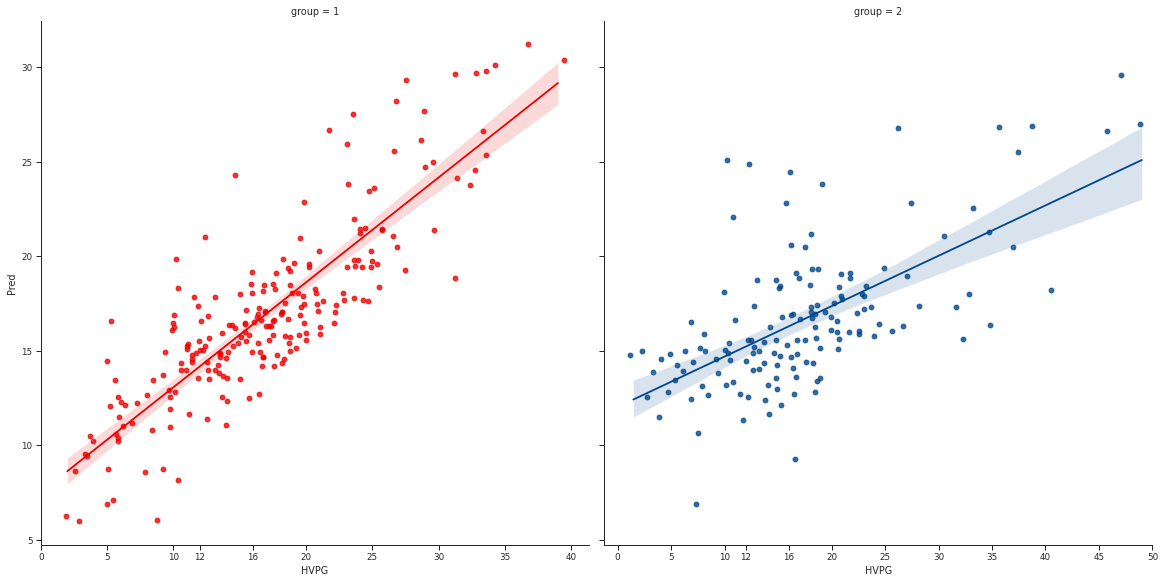

In [163]:
sns.set(context='paper',font='Aria',font_scale=1)
pal1 = sns.color_palette(['#ED0000','#00468B'])
sns.set_style("ticks")
pic=sns.lmplot(x='HVPG', y='Pred', data=df,hue='group',palette=pal1,col='group',height=8,sharey = True,sharex = False,scatter=True,fit_reg=True,ci=95,x_jitter=0.5)
ax1, ax2 = pic.axes[0]
ax1.set_xticks([0, 5, 10, 12, 16, 20, 25, 30, 35, 40])
ax2.set_xticks([0, 5, 10, 12, 16, 20, 25, 30, 35, 40, 45, 50])
#pic.savefig('相关.eps',dpi=900,format='eps')
#pic.savefig('相关.jpg',dpi=900,format='jpg')

<Figure size 1872x360 with 0 Axes>

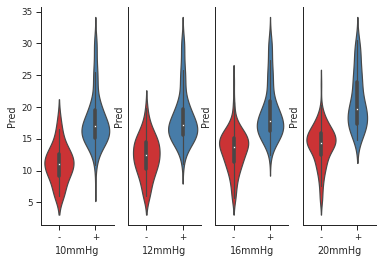

In [144]:
#
#fig = plt.figure(figsize=(26,5))
#lw = 2
#font1 = {'family' : 'Arial',
#'weight' : 'normal',
#'size'   : 12,}
#fig,axes=plt.subplots(1,4)  
#
##PH10
#train_10=train.loc[:,['Pred','PH10']]
#ax=sns.violinplot(y="Pred",x='PH10',
#              data=train_10, palette="Set1",split=False,ax=axes[0])
#
#
#train_12=train.loc[:,['Pred','PH12']]
#ax=sns.violinplot(y="Pred",x='PH12',
#              data=train_12, palette="Set1",split=False,ax=axes[1])
#
#train_16=train.loc[:,['Pred','PH16']]
#ax=sns.violinplot(y="Pred",x='PH16',
#              data=train_16, palette="Set1",split=False,ax=axes[2])
#
#train_20=train.loc[:,['Pred','PH20']]
#ax=sns.violinplot(y="Pred",x='PH20',
#              data=train_20, palette="Set1",split=False,ax=axes[3])
#axes[1].yaxis.set_major_locator(plt.NullLocator())
#axes[2].yaxis.set_major_locator(plt.NullLocator())
#axes[3].yaxis.set_major_locator(plt.NullLocator())
#
#axes[0].set_xlabel('10mmHg')
#axes[1].set_xlabel('12mmHg')
#axes[2].set_xlabel('16mmHg')
#axes[3].set_xlabel('20mmHg')
#axes[0].set_xticklabels(['-','+'])
#axes[1].set_xticklabels(['-','+'])
#axes[2].set_xticklabels(['-','+'])
#axes[3].set_xticklabels(['-','+'])
#sns.despine()
#plt.show()
##fig.savefig('figure_1_b_vio.ai',dpi=900,format='eps')
#

<Figure size 1872x360 with 0 Axes>

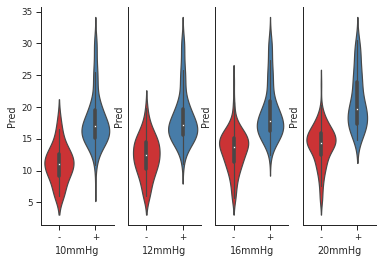

In [145]:
#fig = plt.figure(figsize=(26,5))
#lw = 2
#font1 = {'family' : 'Arial',
#'weight' : 'normal',
#'size'   : 12,}
#fig,axes=plt.subplots(1,4)  
#
##PH10
#test_10=test.loc[:,['Pred','PH10']]
#ax=sns.violinplot(y="Pred",x='PH10',
#              data=train_10, palette="Set1",split=False,ax=axes[0])
#
#test_12=test.loc[:,['Pred','PH12']]
#ax=sns.violinplot(y="Pred",x='PH12',
#              data=train_12, palette="Set1",split=False,ax=axes[1])
#
#test_16=test.loc[:,['Pred','PH16']]
#ax=sns.violinplot(y="Pred",x='PH16',
#              data=train_16, palette="Set1",split=False,ax=axes[2])
#
#test_20=test.loc[:,['Pred','PH20']]
#ax=sns.violinplot(y="Pred",x='PH20',
#              data=train_20, palette="Set1",split=False,ax=axes[3])
#axes[1].yaxis.set_major_locator(plt.NullLocator())
#axes[2].yaxis.set_major_locator(plt.NullLocator())
#axes[3].yaxis.set_major_locator(plt.NullLocator())
#axes[0].set_xlabel('10mmHg')
#axes[1].set_xlabel('12mmHg')
#axes[2].set_xlabel('16mmHg')
#axes[3].set_xlabel('20mmHg')
#axes[0].set_xticklabels(['-','+'])
#axes[1].set_xticklabels(['-','+'])
#axes[2].set_xticklabels(['-','+'])
#axes[3].set_xticklabels(['-','+'])
#sns.despine()
#plt.show()
#
##fig.savefig('figure_1_b_vio_test.ai',dpi=900,format='eps')

FIGURE1 ROC 

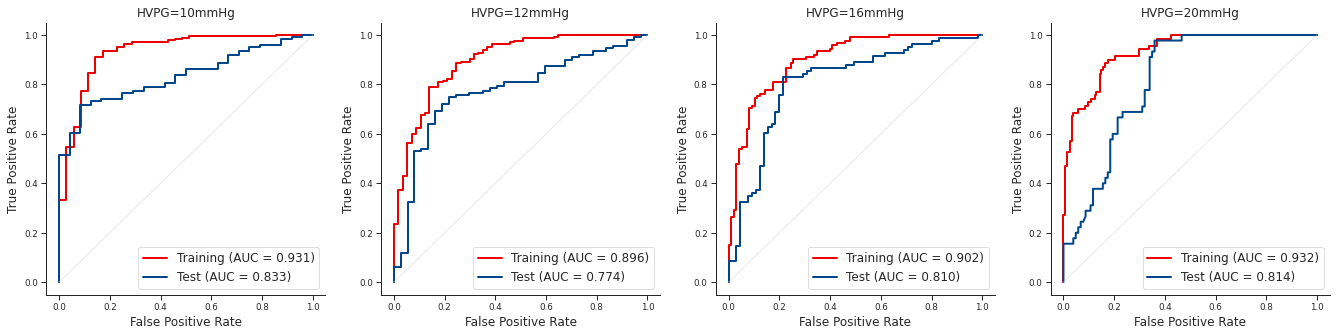

In [20]:
fpr1,tpr1,thresholds1 = roc_curve(y_PH10_train_label,ALL_PRE_train)
fpr2,tpr2,thresholds2 = roc_curve(y_PH12_train_label,ALL_PRE_train)
fpr3,tpr3,thresholds3 = roc_curve(y_PH16_train_label,ALL_PRE_train)
fpr4,tpr4,thresholds4 = roc_curve(y_PH20_train_label,ALL_PRE_train)                        

fpr1_t,tpr1_t,thresholds1_t = roc_curve(y_PH10_test_label,ALL_PRE)
fpr2_t,tpr2_t,thresholds2_t = roc_curve(y_PH12_test_label,ALL_PRE)
fpr3_t,tpr3_t,thresholds3_t = roc_curve(y_PH16_test_label,ALL_PRE)
fpr4_t,tpr4_t,thresholds4_t = roc_curve(y_PH20_test_label,ALL_PRE)

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

roc_auc_1_t = auc(fpr1_t,tpr1_t)
roc_auc_2_t = auc(fpr2_t,tpr2_t)
roc_auc_3_t = auc(fpr3_t,tpr3_t)
roc_auc_4_t = auc(fpr4_t,tpr4_t)


fig = plt.figure(figsize=(23,5))
lw = 2
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,}

#plt.plot(fpr1,tpr1,
#         lw=lw, label='PH20(AUC = %0.3f)' % roc_auc1)
plt.subplot(1,4,1)
plt.plot(fpr1,tpr1,
         lw=lw, label='Training (AUC = %0.3f)' % roc_auc_1, color='#ED0000',)
plt.plot(fpr1_t,tpr1_t,
         lw=lw, label='Test (AUC = %0.3f)' % roc_auc_1_t, color='#00468B')
plt.plot([0, 1], [0, 1], linestyle='-', lw=1, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=10mmHg',font1)
plt.legend(loc="best",prop=font1)


plt.subplot(1,4,2)
plt.plot(fpr2,tpr2,
         lw=lw, label='Training (AUC = %0.3f)' % roc_auc_2, color='#ED0000')
plt.plot(fpr2_t,tpr2_t,
         lw=lw, label='Test (AUC = %0.3f)' % roc_auc_2_t, color='#00468B')
plt.plot([0, 1], [0, 1], linestyle='-', lw=1, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=12mmHg',font1)
plt.legend(loc="best",prop=font1)


plt.subplot(1,4,3)
plt.plot(fpr3,tpr3,
         lw=lw, label='Training (AUC = %0.3f)' % roc_auc_3, color='#ED0000')
plt.plot(fpr3_t,tpr3_t,
         lw=lw, label='Test (AUC = %0.3f)' % roc_auc_3_t, color='#00468B')
plt.plot([0, 1], [0, 1], linestyle='-', lw=1, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=16mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(1,4,4)
plt.plot(fpr4,tpr4,
         lw=lw, label='Training (AUC = %0.3f)' % roc_auc_4, color='#ED0000')
plt.plot(fpr4_t,tpr4_t,
         lw=lw, label='Test (AUC = %0.3f)' % roc_auc_4_t, color='#00468B')
plt.plot([0, 1], [0, 1], linestyle='-', lw=1, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=20mmHg',font1)
plt.legend(loc="best",prop=font1)

sns.despine()
plt.show()
#fig.savefig('figure_1_c.eps',dpi=900,format='eps')
#fig.savefig('figure_1_c.png',dpi=900,format='png')

Figure 3

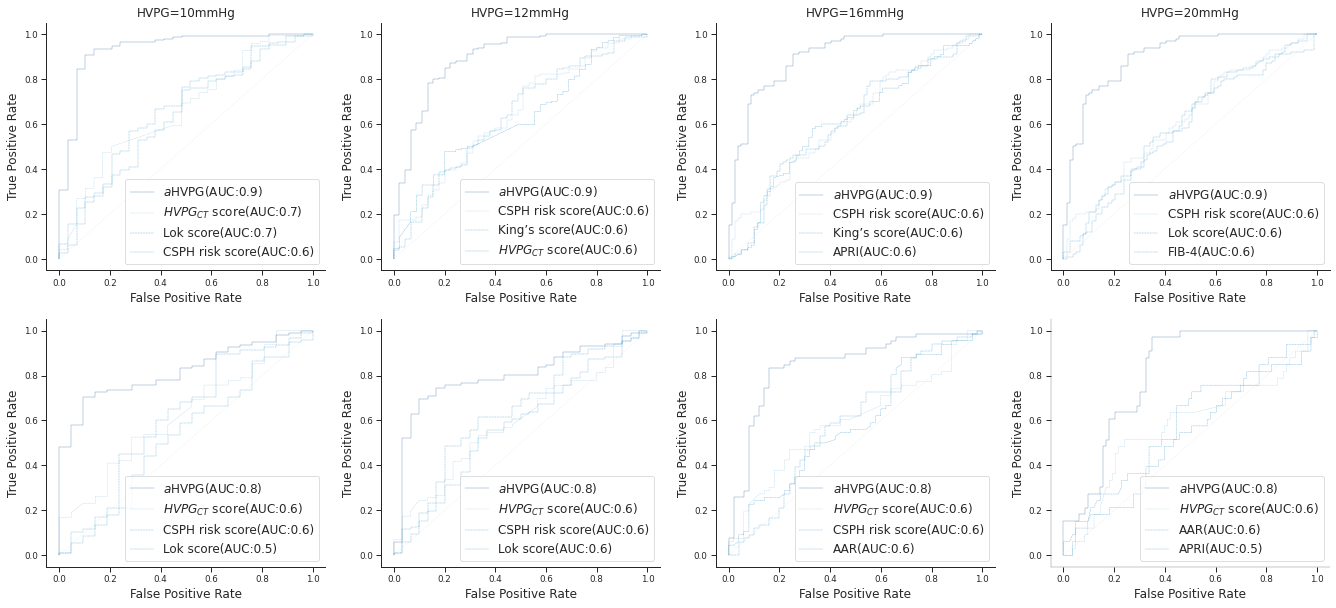

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [165]:
df = pd.read_csv('/result.csv')
train = df.loc[df["group"] == 1]
test = df.loc[df["group"] == 2]

number = test.loc[:,'ImageNo']
test_label_pred=test.iloc[:,6:11]
lab=test.iloc[:,36:44]
test_compare_all=pd.concat([number,test_label_pred,lab], axis=1)
#找到异常值
test_compare = test_compare_all.dropna()
test=test_compare

number = train.loc[:,'ImageNo']
train_label_pred=train.iloc[:,6:11]
lab=train.iloc[:,36:44]
train_compare_all=pd.concat([number,train_label_pred,lab], axis=1)
train_compare = train_compare_all.dropna()
train=train_compare 

#Pred_train = train.loc[:,'Pred']
#CTscore_train = train.loc[:,'CTscore']
#AAR_train = train.loc[:,'AAR']
#APRI_train = train.loc[:,'APRI']
#CSPHriskscore_train = train.loc[:,'CSPHriskscore']
#FIB_train = train.loc[:,'FIB-4']
#FibIndex_train = train.loc[:,'FibIndex']
#King_train = train.loc[:,'King']
#Lok_train = train.loc[:,'Lok']
#
#Pred_test = test.loc[:,'Pred']
#CTscore_test = test.loc[:,'CTscore']
#AAR_test = test.loc[:,'AAR']
#APRI_test = test.loc[:,'APRI']
#CSPHriskscore_test = test.loc[:,'CSPHriskscore']
#FIB_test = test.loc[:,'FIB-4']
#FibIndex_test = test.loc[:,'FibIndex']
#King_test = test.loc[:,'King']
#Lok_test = test.loc[:,'Lok']

fig = plt.figure(figsize=(23,10))
lw = 0.25
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,}
modelname='${a}$HVPG'
#241
#plt.plot(fpr1,tpr1,
#         lw=lw, label='PH20(AUC = %0.3f)' % roc_auc1)
plt.subplot(2,4,1)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH10'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH10'],train.loc[:,'CTscore'])
fpr3,tpr3,thresholds3 = roc_curve(train.loc[:,'PH10'],train.loc[:,'Lok'])
fpr4,tpr4,thresholds4 = roc_curve(train.loc[:,'PH10'],train.loc[:,'CSPHriskscore']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='${HVPG_{CT}}$ score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Lok score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=10mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,2)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH12'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH12'],train.loc[:,'CSPHriskscore'])
fpr3,tpr3,thresholds3 = roc_curve(train.loc[:,'PH12'],train.loc[:,'King'])
fpr4,tpr4,thresholds4 = roc_curve(train.loc[:,'PH12'],train.loc[:,'CTscore']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='King’s score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='${HVPG_{CT}}$ score(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=12mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,3)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH16'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH16'],train.loc[:,'CSPHriskscore'])
fpr3,tpr3,thresholds3 = roc_curve(train.loc[:,'PH16'],train.loc[:,'King'])
fpr4,tpr4,thresholds4 = roc_curve(train.loc[:,'PH16'],train.loc[:,'APRI']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='King’s score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='APRI(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=16mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,4)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH16'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH16'],train.loc[:,'CSPHriskscore'])
fpr3,tpr3,thresholds3 = roc_curve(train.loc[:,'PH16'],train.loc[:,'Lok'])
fpr4,tpr4,thresholds4 = roc_curve(train.loc[:,'PH16'],train.loc[:,'FIB-4']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Lok score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='FIB-4(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=20mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,5)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH10'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH10'],test.loc[:,'CTscore'])
fpr3,tpr3,thresholds3 = roc_curve(test.loc[:,'PH10'],test.loc[:,'CSPHriskscore'])
fpr4,tpr4,thresholds4 = roc_curve(test.loc[:,'PH10'],test.loc[:,'Lok']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='${HVPG_{CT}}$ score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Lok score(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05],)
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,6)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH12'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH12'],test.loc[:,'CTscore'])
fpr3,tpr3,thresholds3 = roc_curve(test.loc[:,'PH12'],test.loc[:,'CSPHriskscore'])
fpr4,tpr4,thresholds4 = roc_curve(test.loc[:,'PH12'],test.loc[:,'Lok']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='${HVPG_{CT}}$ score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Lok score(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,7)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH16'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH16'],test.loc[:,'CTscore'])
fpr3,tpr3,thresholds3 = roc_curve(test.loc[:,'PH16'],test.loc[:,'CSPHriskscore'])
fpr4,tpr4,thresholds4 = roc_curve(test.loc[:,'PH16'],test.loc[:,'AAR']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='${HVPG_{CT}}$ score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='CSPH risk score(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='AAR(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,8)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH20'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH20'],test.loc[:,'CTscore'])
fpr3,tpr3,thresholds3 = roc_curve(test.loc[:,'PH20'],test.loc[:,'AAR'])
fpr4,tpr4,thresholds4 = roc_curve(test.loc[:,'PH20'],test.loc[:,'APRI']) 

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)
roc_auc_3 = auc(fpr3,tpr3)
roc_auc_4 = auc(fpr4,tpr4)

plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='${HVPG_{CT}}$ score(AUC:%0.1f)' % roc_auc_2, color='#007bbb',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='AAR(AUC:%0.1f)' % roc_auc_3, color='#007bbb',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='APRI(AUC:%0.1f)' % roc_auc_4, color='#007bbb',linestyle='--',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(0.25);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(0.25);####设置左边坐标轴的粗细


sns.despine()
plt.show()
fig.savefig('figure_3比较418.ai',dpi=1200,format='eps')
#fig.savefig('figure_3比较.png',dpi=1200,format='png')

HVPGCT score
AAR	
APRI
CSPH risk score	
FIB-4
Fibrosis Index
GPR
King’s score
Lok score

Figure S 与肝硬度比较

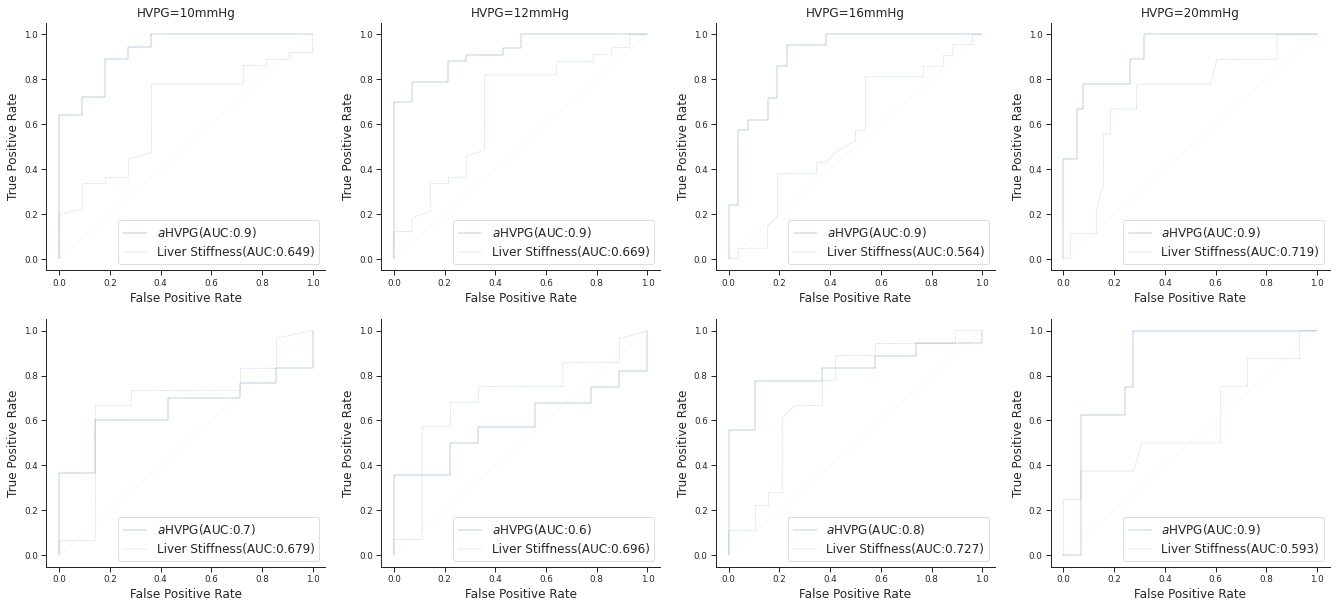

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [166]:
df = pd.read_csv('/result.csv')
train = df.loc[df["group"] == 1]
test = df.loc[df["group"] == 2]
number = test.loc[:,'ImageNo']
test_label_pred=test.iloc[:,6:11]
LS=test.loc[:,'LiverStiffness']
test_compare_all=pd.concat([number,test_label_pred,LS], axis=1)
#找到异常值
test_compare = test_compare_all.dropna()
test=test_compare

number = train.loc[:,'ImageNo']
train_label_pred=train.iloc[:,6:11]
LS=train.loc[:,'LiverStiffness']
train_compare_all=pd.concat([number,train_label_pred,LS], axis=1)
train_compare = train_compare_all.dropna()
train=train_compare 

fig = plt.figure(figsize=(23,10))
lw = 0.25
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,}
modelname='${a}$HVPG'
#241
#plt.plot(fpr1,tpr1,
#         lw=lw, label='PH20(AUC = %0.3f)' % roc_auc1)
plt.subplot(2,4,1)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH10'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH10'],train.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=10mmHg',font1)
plt.legend(loc="best",prop=font1)


plt.subplot(2,4,2)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH12'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH12'],train.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=12mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,3)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH16'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH16'],train.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=16mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,4)
fpr1,tpr1,thresholds1 = roc_curve(train.loc[:,'PH20'],train.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(train.loc[:,'PH20'],train.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=20mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,5)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH10'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH10'],test.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc= 'lower right',prop=font1)


plt.subplot(2,4,6)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH12'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH12'],test.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,7)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH16'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH16'],test.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,8)
fpr1,tpr1,thresholds1 = roc_curve(test.loc[:,'PH20'],test.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(test.loc[:,'PH20'],test.loc[:,'LiverStiffness'])

roc_auc_1 = auc(fpr1,tpr1)
roc_auc_2 = auc(fpr2,tpr2)


plt.plot(fpr1,tpr1,
         lw=lw, label='%s(AUC:%0.1f)' % (modelname,roc_auc_1), color='#00468B',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Liver Stiffness(AUC:%0.3f)' % roc_auc_2, color='#00468B',linestyle=':',)


plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

sns.despine()
plt.show()
fig.savefig('FigureS与肝硬度比较418.ai',dpi=1200,format='eps')
#fig.savefig('FigureS与肝硬度比较.png',dpi=1200,format='png')

figure S robust

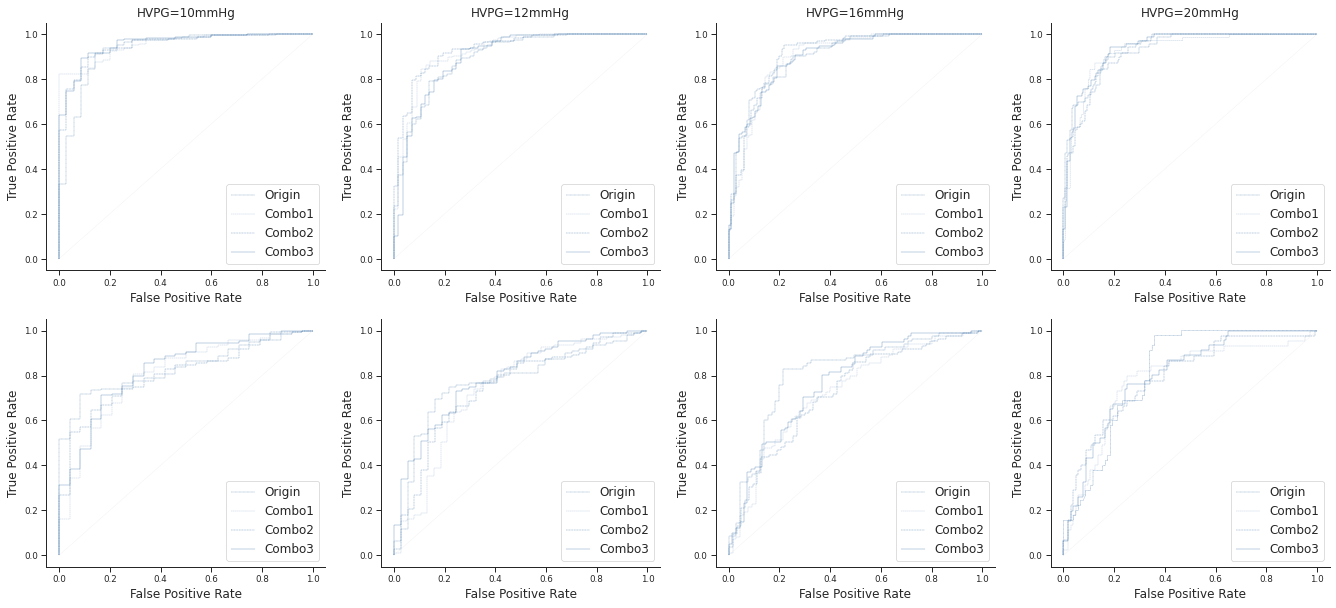

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [16]:
df_train = pd.read_csv('/root/liver_spleen_seg/radiomics/model/robust_train.csv')
origin = df_train.loc[df_train["group"] == 1]
combo1 = df_train.loc[df_train["group"] == 2]
combo2 = df_train.loc[df_train["group"] == 3]
combo3 = df_train.loc[df_train["group"] == 4]

fig = plt.figure(figsize=(23,10))
lw = 0.25
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,}

#241
#plt.plot(fpr1,tpr1,
#         lw=lw, label='PH20(AUC = %0.3f)' % roc_auc1)
plt.subplot(2,4,1)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH10'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH10'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH10'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH10'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=10mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,2)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH12'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH12'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH12'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH12'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=12mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,3)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH16'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH16'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH16'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH16'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=16mmHg',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,4)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH20'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH20'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH20'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH20'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.title('HVPG=20mmHg',font1)
plt.legend(loc="best",prop=font1)

df_train = pd.read_csv('/root/liver_spleen_seg/radiomics/model/robust_test.csv')
origin = df_train.loc[df_train["group"] == 1]
combo1 = df_train.loc[df_train["group"] == 2]
combo2 = df_train.loc[df_train["group"] == 3]
combo3 = df_train.loc[df_train["group"] == 4]

plt.subplot(2,4,5)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH10'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH10'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH10'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH10'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,6)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH12'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH12'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH12'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH12'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,7)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH16'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH16'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH16'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH16'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

plt.subplot(2,4,8)
fpr1,tpr1,thresholds1 = roc_curve(origin.loc[:,'PH20'],origin.loc[:,'Pred'])
fpr2,tpr2,thresholds2 = roc_curve(combo1.loc[:,'PH20'],combo1.loc[:,'Pred'])
fpr3,tpr3,thresholds3 = roc_curve(combo2.loc[:,'PH20'],combo2.loc[:,'Pred'])
fpr4,tpr4,thresholds4 = roc_curve(combo3.loc[:,'PH20'],combo3.loc[:,'Pred']) 

plt.plot(fpr1,tpr1,
         lw=lw, label='Origin' , color='#00468B',linestyle='--',)
plt.plot(fpr2,tpr2,
         lw=lw, label='Combo1', color='#00468B',linestyle=':',)
plt.plot(fpr3,tpr3,
         lw=lw, label='Combo2', color='#00468B',linestyle='-.',)
plt.plot(fpr4,tpr4,
         lw=lw, label='Combo3', color='#00468B',)

plt.plot([0, 1], [0, 1], linestyle='-', lw=lw, color='lightgrey',
     alpha=.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',font1)
plt.ylabel('True Positive Rate',font1)
plt.legend(loc="best",prop=font1)

sns.despine()
plt.show()
fig.savefig('FigureS_robust.ai',dpi=1200,format='eps')
#fig.savefig('FigureS_robust.png',dpi=1200,format='png')

敏感性特异性

In [289]:
df = pd.read_csv('/result.csv')
train = df.loc[df["group"] == 1]
test = df.loc[df["group"] == 2]

y_PH10_train_label=train.iloc[:,6]
y_PH12_train_label=train.iloc[:,7]
y_PH16_train_label=train.iloc[:,8]
y_PH20_train_label=train.iloc[:,9]
y_PH10_test_label=test.iloc[:,6]
y_PH12_test_label=test.iloc[:,7]
y_PH16_test_label=test.iloc[:,8]
y_PH20_test_label=test.iloc[:,9]
ALL_PRE_train=train.iloc[:,10]
ALL_PRE=test.iloc[:,10]
y_train=train.iloc[:,3]
y_test=test.iloc[:,3]

def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point


#fpr1,tpr1,thresholds1 = roc_curve(y_PH5_train_label,ALL_PRE_train)
#optimal_th_PH10, optimal_point_CSPH = Find_Optimal_Cutoff(TPR=tpr1,FPR=fpr1, 
#                                                          threshold=thresholds1)

fpr1,tpr1,thresholds1 = roc_curve(y_PH10_train_label,ALL_PRE_train)
optimal_th_PH10, optimal_point_PH10 = Find_Optimal_Cutoff(TPR=tpr1, FPR=fpr1, 
                                                          threshold=thresholds1)

fpr2,tpr2,thresholds2 = roc_curve(y_PH12_train_label,ALL_PRE_train)
optimal_th_PH12, optimal_point_PH12 = Find_Optimal_Cutoff(TPR=tpr2, FPR=fpr2, 
                                                        threshold=thresholds2)

fpr3,tpr3,thresholds3 = roc_curve(y_PH16_train_label,ALL_PRE_train)
optimal_th_PH16, optimal_point_PH16 = Find_Optimal_Cutoff(TPR=tpr3, FPR=fpr3, 
                                                          threshold=thresholds3)

fpr4,tpr4,thresholds4 = roc_curve(y_PH20_train_label,ALL_PRE_train)
optimal_th_PH20, optimal_point_PH20 = Find_Optimal_Cutoff(TPR=tpr4, FPR=fpr4, 
                                                        threshold=thresholds3)

def Find_rule_in_out(FPR, TPR, threshold):
    a=TPR
    rule_out=np.argmax(a>=0.9)
    ruleout_threshold = threshold[rule_out]
    q=sen_train_ruleout=TPR[rule_out]
    w=spe_train_ruleout=1-FPR[rule_out]
    
    b=FPR
    rule_in=np.argmax(b>0.1)
    rule_in=rule_in-1
    rulein_threshold = threshold[rule_in]
    e=sen_train_rulein=TPR[rule_in]
    r=spe_train_rulein=1-FPR[rule_in]
    

    return ruleout_threshold, rulein_threshold,q,w,e,r

#ruleout_PH5,rulein_PH5,ruleout_PH5_sen,ruleout_PH5_spe,rulein_PH5_sen,rulein_PH5_spe=Find_rule_in_out(fpr1,tpr1,thresholds1)
ruleout_PH10,rulein_PH10,ruleout_PH10_sen,ruleout_PH10_spe,rulein_PH10_sen,rulein_PH10_spe=Find_rule_in_out(fpr1,tpr1,thresholds1)
ruleout_PH12,rulein_PH12,ruleout_PH12_sen,ruleout_PH12_spe,rulein_PH12_sen,rulein_PH12_spe=Find_rule_in_out(fpr2,tpr2,thresholds2)
ruleout_PH16,rulein_PH16,ruleout_PH16_sen,ruleout_PH16_spe,rulein_PH16_sen,rulein_PH16_spe=Find_rule_in_out(fpr3,tpr3,thresholds3)
ruleout_PH20,rulein_PH20,ruleout_PH20_sen,ruleout_PH20_spe,rulein_PH20_sen,rulein_PH20_spe=Find_rule_in_out(fpr4,tpr4,thresholds4)

print(ruleout_PH10,rulein_PH10,ruleout_PH10_sen,ruleout_PH10_spe,rulein_PH10_sen,rulein_PH10_spe)
print(ruleout_PH12,rulein_PH12,ruleout_PH12_sen,ruleout_PH12_spe,rulein_PH12_sen,rulein_PH12_spe)
print(ruleout_PH16,rulein_PH16,ruleout_PH16_sen,ruleout_PH16_spe,rulein_PH16_sen,rulein_PH16_spe)
print(ruleout_PH20,rulein_PH20,ruleout_PH20_sen,ruleout_PH20_spe,rulein_PH20_sen,rulein_PH20_spe)

13.80442063 15.0074246 0.91005291005291 0.8571428571428572 0.7724867724867724 0.9142857142857143
14.3554881 16.48454762 0.9041916167664671 0.7017543859649122 0.6227544910179641 0.9122807017543859
15.40815873 16.86548413 0.9047619047619048 0.7448979591836735 0.7142857142857143 0.9081632653061225
17.09245635 18.24965079 0.9 0.8246753246753247 0.7285714285714285 0.9025974025974026


In [291]:
def senandspe_th(th_name,optimal_th,train_label,test_label):
    TRAIN_PRED_LABEL = np.zeros([len(ALL_PRE_train), 1])
    TRAIN_PRED_LABEL[ALL_PRE_train >= optimal_th] = 1
    TEST_PRED_LABEL= np.zeros([len(ALL_PRE), 1])
    TEST_PRED_LABEL[ALL_PRE >= optimal_th] = 1
    tn, fp, fn, tp = confusion_matrix(train_label, TRAIN_PRED_LABEL).ravel()
    train_sens = tp / (tp + fn)
    train_spec = tn / (tn + fp)
    PPV = tp / (tp + fp)
    NPV = tn / (tn + fn)
    print("TRAIN\t",th_name,'\t','%.3f'%optimal_th,'\t'," tp\t",'\t',tp,'\t',"fp\t",fp,'\t'," tn\t",tn,'\t'," fn\t",fn,'\t',"PPV\t",'%.3f'%PPV,'\t',"NPV\t",'%.3f'%NPV,'\t',
          "sensetivity\t",'%.3f'%train_sens,'\t',"specificity\t",'%.3f'%train_spec)
    tn, fp, fn, tp = confusion_matrix(test_label, TEST_PRED_LABEL).ravel()
    test_sens = tp / (tp + fn)
    test_spec = tn / (tn + fp)
    PPV = tp / (tp + fp)
    NPV = tn / (tn + fn)
    print("TEST\t",th_name,'\t','%.3f'%optimal_th,'\t'," tp\t",tp,'\t'," fp\t",fp,'\t'," tn\t",tn,'\t'," fn\t",fn,'\t',"PPV\t",'%.3f'%PPV,'\t',"NPV\t",'%.3f'%NPV,'\t',
          "sensetivity\t",'%.3f'%test_sens,'\t',"specificity\t",'%.3f'%test_spec)   
    pass

senandspe_th("Y-index10",optimal_th_PH10,y_PH10_train_label,y_PH10_test_label)
senandspe_th("out10",ruleout_PH10,y_PH10_train_label,y_PH10_test_label)
senandspe_th("in10",rulein_PH10,y_PH10_train_label,y_PH10_test_label)

senandspe_th("Y-index12",optimal_th_PH12,y_PH12_train_label,y_PH12_test_label)
senandspe_th("out12",ruleout_PH12,y_PH12_train_label,y_PH12_test_label)
senandspe_th("in12",rulein_PH12,y_PH12_train_label,y_PH12_test_label)

senandspe_th("Y-index16",optimal_th_PH16,y_PH16_train_label,y_PH16_test_label)
senandspe_th("out16",ruleout_PH16,y_PH16_train_label,y_PH16_test_label)
senandspe_th("in16",rulein_PH16,y_PH16_train_label,y_PH16_test_label)

senandspe_th("Y-index20",optimal_th_PH20,y_PH20_train_label,y_PH20_test_label)
senandspe_th("out20",ruleout_PH20,y_PH20_train_label,y_PH20_test_label)
senandspe_th("in20",rulein_PH20,y_PH20_train_label,y_PH20_test_label)

TRAIN	 Y-index10 	 13.804 	  tp	 	 172 	 fp	 5 	  tn	 30 	  fn	 17 	 PPV	 0.972 	 NPV	 0.638 	 sensetivity	 0.910 	 specificity	 0.857
TEST	 Y-index10 	 13.804 	  tp	 	 107 	  fp	 15 	  tn	 9 	  fn	 17 	 PPV	 0.877 	 NPV	 0.346 	 sensetivity	 0.863 	 specificity	 0.375
TRAIN	 out10 	 13.804 	  tp	 	 172 	 fp	 5 	  tn	 30 	  fn	 17 	 PPV	 0.972 	 NPV	 0.638 	 sensetivity	 0.910 	 specificity	 0.857
TEST	 out10 	 13.804 	  tp	 	 107 	  fp	 15 	  tn	 9 	  fn	 17 	 PPV	 0.877 	 NPV	 0.346 	 sensetivity	 0.863 	 specificity	 0.375
TRAIN	 in10 	 15.007 	  tp	 	 146 	 fp	 3 	  tn	 32 	  fn	 43 	 PPV	 0.980 	 NPV	 0.427 	 sensetivity	 0.772 	 specificity	 0.914
TEST	 in10 	 15.007 	  tp	 	 91 	  fp	 3 	  tn	 21 	  fn	 33 	 PPV	 0.968 	 NPV	 0.389 	 sensetivity	 0.734 	 specificity	 0.875
TRAIN	 Y-index12 	 15.390 	  tp	 	 132 	 fp	 8 	  tn	 49 	  fn	 35 	 PPV	 0.943 	 NPV	 0.583 	 sensetivity	 0.790 	 specificity	 0.860
TEST	 Y-index12 	 15.390 	  tp	 	 80 	  fp	 7 	  tn	 30 	  fn	 31 	 PPV	 0

线性建模

In [309]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [311]:
df = pd.read_csv('/result.csv')
train = df.loc[df["group"] == 1]
test = df.loc[df["group"] == 2]
gt = train.iloc[:,3]
train_lab=train.iloc[:,22:27]
pred=train.loc[:,'Pred']
train_all=pd.concat([gt,pred,train_lab], axis=1)
#找到异常值
train_all_a =train_all.dropna()


model = smf.ols('HVPG ~ Pred + ALB + INR + AST + ALT + PLT', data=train_all_a).fit()



In [313]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   HVPG   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     87.45
Date:                   日, 21 3月 2021   Prob (F-statistic):           1.32e-51
Time:                        19:22:58   Log-Likelihood:                -534.98
No. Observations:                 194   AIC:                             1084.
Df Residuals:                     187   BIC:                             1107.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6199      3.325     -2.592      0.0

In [13]:
from sklearn import set_config

set_config(display='diagram')
model

Pipeline(steps=[('binarizer', Binarizer(threshold=0.55)),
                ('stackingestimator-1',
                 StackingEstimator(estimator=SGDRegressor(alpha=0.001, eta0=0.1,
                                                          l1_ratio=0.25,
                                                          learning_rate='constant',
                                                          loss='epsilon_insensitive',
                                                          penalty='elasticnet',
                                                          power_t=50.0))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=SGDRegressor(alpha=0.001, eta0=1.0,
                                                          fit_intercept=False,
                                                          l...
                 StackingEstimator(estimator=LinearSVR(C=10.0, epsilon=0.1,
                                                       loss='squared_epsilon_insensitive'))),
                ('selectpercentile',
                 SelectPercentile(percentile=8,
                                  score_func=<function f_regression at 0x7f2d59febe60>)),
                ('normalizer', Normalizer(norm='max')),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.05,
                                       min_samples_leaf=5,
                                       min_samples_split=8))])